In [263]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pconst import const


In [264]:
sns.set(rc={'figure.figsize':(15, 4)})

pd.set_option('display.max_rows',5000)

In [265]:
df = pd.read_csv('/Users/thejakamahaulpatha/PycharmProjects/Project - Undervalued Stock/Data Set/AAPL.csv')

In [266]:
df.shape

(10202, 7)

In [267]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600


In [268]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10197,2021-05-24,126.010002,127.940002,125.940002,127.099998,127.099998,63092900
10198,2021-05-25,127.820000,128.320007,126.320000,126.900002,126.900002,72009500
10199,2021-05-26,126.959999,127.389999,126.419998,126.849998,126.849998,56575900
10200,2021-05-27,126.440002,127.639999,125.080002,125.279999,125.279999,94625600
10201,2021-05-28,125.570000,125.800003,124.550003,124.610001,124.610001,71232700


In [269]:
df['Date'] = pd.to_datetime(df['Date'])

In [270]:
# df = df.set_index('Date')

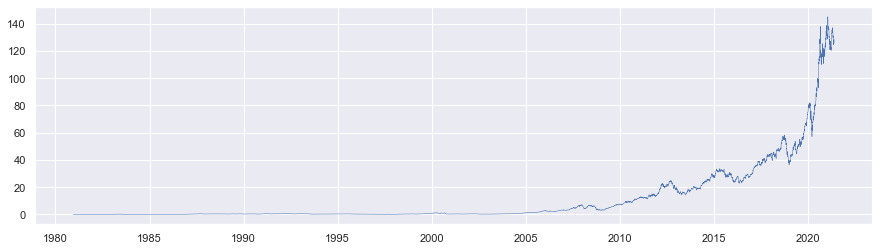

In [271]:
plt.plot(df['Date'],df['High'],linewidth=0.5)

In [272]:
#Get the year from a Date object
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [273]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600,1980
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800,1980
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000,1980
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600,1980
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600,1980


In [274]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Year                  int64
dtype: object

In [275]:
rows = df.count
df['Growth Rate'] = ""

for i in df.index:
    year = df['Year'][i]
    if year in range(2011,2022):
        if i!=0:
            df['Growth Rate'][i] = ((df['Close'][i])-(df['Close'][i-1]))/df['Close'][i-1]
# # #     print(i)

<ipython-input-275-e0f803676714>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Growth Rate'][i] = ((df['Close'][i])-(df['Close'][i-1]))/df['Close'][i-1]


In [276]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Growth Rate
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600,1980,
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800,1980,
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000,1980,
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600,1980,
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600,1980,


In [277]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Growth Rate
10197,2021-05-24,126.010002,127.940002,125.940002,127.099998,127.099998,63092900,2021,0.013314
10198,2021-05-25,127.820000,128.320007,126.320000,126.900002,126.900002,72009500,2021,-0.001574
10199,2021-05-26,126.959999,127.389999,126.419998,126.849998,126.849998,56575900,2021,-0.000394
10200,2021-05-27,126.440002,127.639999,125.080002,125.279999,125.279999,94625600,2021,-0.012377
10201,2021-05-28,125.570000,125.800003,124.550003,124.610001,124.610001,71232700,2021,-0.005348


In [278]:
sum_Of_Growth_Rates = (df.loc[df['Growth Rate'] != '', "Growth Rate"].sum())

sum_Of_Growth_Rates

2.805351925912262

In [279]:
count_Of_Growth_Rates = df.loc[df['Growth Rate'] != '', "Growth Rate"].count()
average_GrowthRate_perDay = sum_Of_Growth_Rates /count_Of_Growth_Rates

average_GrowthRate_perDay

0.0010711538472364497

In [280]:
# Let's Calculate the growth rate in a different way

In [281]:
for i in df.index:
    year = df['Year'][i]
    if year in range(2011,2022):
        FirstRate = df['Close'][i]
        FirstYear = df['Year'][i]
        break
    
print(FirstRate,FirstYear)

11.770357 2011


In [282]:
for i in df.index:
    year = df['Year'][i]
    if year in range(2011,2022):
        LastRate = df['Close'][i]
        LastYear = df['Year'][i]

        
    
print(LastRate,LastYear)

124.610001 2021


In [283]:
Average_GrowthRate = (LastRate-FirstRate)/FirstRate

Average_GrowthRate

9.586764785469123

In [ ]:
# https://keisan.casio.com/exec/system/1232693402

In [290]:
Total_years = LastYear - FirstYear

Daily_Compount_Rate = 360*((LastRate/FirstRate)**(1/(Total_years*360))-1)

Daily_Compount_Rate

0.23603780811770392